In [1]:
%matplotlib inline
import sys
sys.path.insert(1,'../Utilities')
# notebook
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import networkx as nx
import json
from math import sin, cos, sqrt, atan2, radians
from utils import *
from data import *
from metaNetBusinessSide import *
from foodWebGraphing import *
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [ ]:
dta = validatedEiggData()
dta = dta.dropna(subset=['Start date year'])
sorted(filter(lambda x: type(x) == np.float64,list(Counter(dta["Start date year"]).keys())))[-1]

### Decision 1: Time frame for Eco Net

Let's say we take the last 10 years of available data (start date year) so that we can be reasonably sure those species are still there

### Decision 2: Who's included in Business Net

A lot of people on Eigg are involved in the ecological preservation/ have their livelihood tie to it since thats why tourists come; here we only look at people specifically on commitees (who wield most protection power) and hence have most power to protect the ecology.

### Decision 3: Meta - Net links

This will be anyone who has a direct dependance on the Ecology of Eigg; again this definition needs to be constrained, since technically everyone does, hence we constrain it here to be those who directly take the resource; fishermen, sightseeing organisations

In [ ]:
environmentallyDependant = getEnvironmentallyInvolvedPeople()
environmentallyDependant
    # nodes in the examinable period for manual search
    #Will automate later
#       ['aurelia aurita', => Moon jelly
#      'larus argentatus', => Herring gull (seagull)
#      'lanice conchilega', => Sand Worm
#      'luidia ciliaris', => Starfish
#      'turdus merula', => Blackbird
#      'jassa falcata', => Scud
#      'callionymus lyra', => Dragonet fish
#      'rosa spinosissima', => Wild (white) rose
#      'trisopterus minutus', => Cod
#      'spirorbis', => Little sea worm
#      'dictyota dichotoma', => Forkweed (algae) / seaweed
#      'asterias rubens', => Starfish
#      'pecten maximus', => Scallop
#      'nephrops norvegicus', => Lobster
#      'phalacrocorax aristotelis', => Shag
#      'cyanea capillata', => jellyfish
#      'marthasterias glacialis', => starfish
#      'caprella', => Shrimp
#      'porifera', => Sponge
#      'ophiothrix fragilis', => Starfish
#      'calliostoma zizyphinum', => Sea snail
#      'phrynorhombus norvegicus', => Flatfish
#      'larus marinus', => other seagull
#      'echinus esculentus', => Sea urchin
#      'cancer pagurus', => crab
#      'necora puber', => Crab
#      'labrus mixtus', => coloured small fish
#      'electra pilosa', => hairy sea mat
#      'pagurus', => Hermit crab
#      'onchidoris bilamellata', => Sea slug
#      'somateria mollissima'] => Eider (duck)


In [ ]:
G,mapping = graphFoodWeb(dateRange=(2015,2021))
pos=nx.spring_layout(G,k=1)
nx.draw(G,pos)
for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=mapping[label],horizontalalignment='center',fontsize=24)
    

# saveGraphToFile(G,'animals.txt')
# labelsInOrder = list(G.nodes())
# np.savetxt('animalsForFun.txt', labelsInOrder, '%s')

## supplement them here with all of the nodes (involving isolates that arent constructed by routine)

In [ ]:
dict(G.degree())

In [ ]:
df = validatedEiggData()
res = constrainByTaxonomy(df, ("Class", "Actinopterygii"))
res

In [ ]:
G = buildEnrichedFoodWeb()
pos=nx.spring_layout(G,k=1)
for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=label,horizontalalignment='center',fontsize=24)
nx.draw(G,pos)


In [2]:
Gs,Ge,M = createEntireMetaNetExperiment()

../Utilities\metaNetBusinessSide.py:236: DtypeWarning: Columns (9,22) have mixed types. Specify dtype option on import or set low_memory=False.
  tempG,tempMapping = graphFoodWeb(dateRange=daterange)
../Utilities\metaNetBusinessSide.py:304: DtypeWarning: Columns (9,22) have mixed types. Specify dtype option on import or set low_memory=False.
  Ge = buildEnrichedFoodWeb(daterange=(2010,2020))


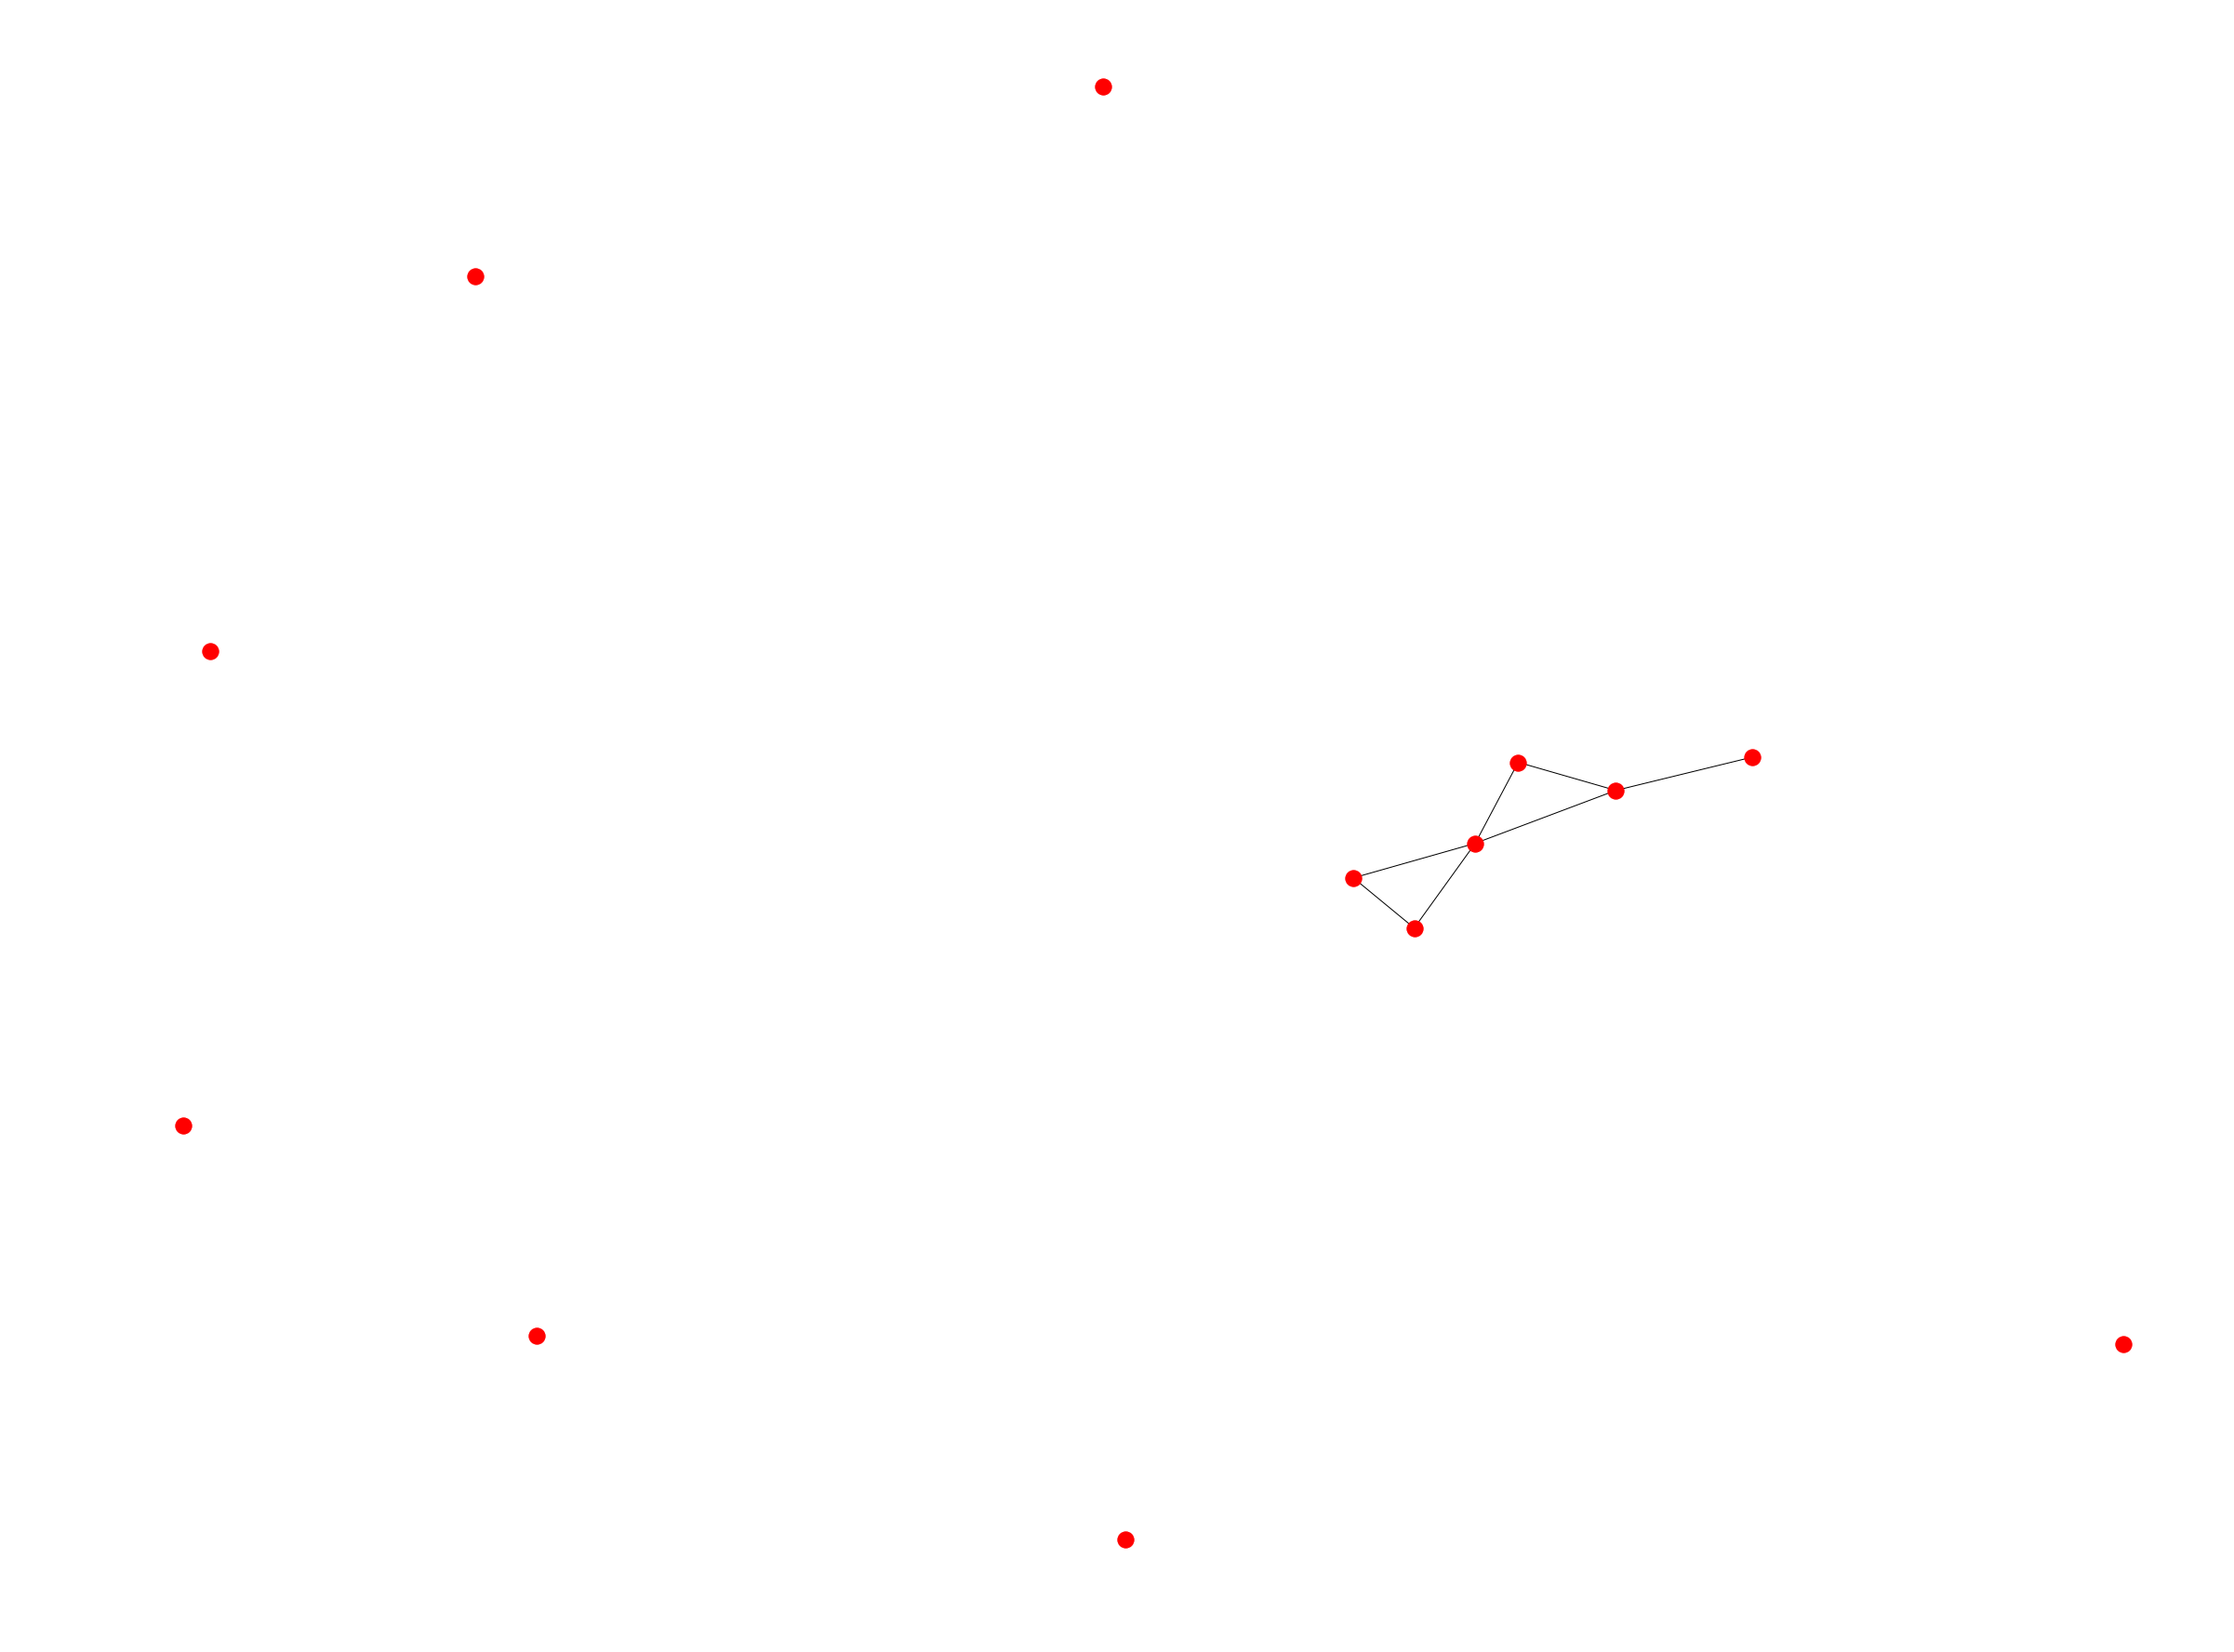

In [5]:
nx.draw(Gs)

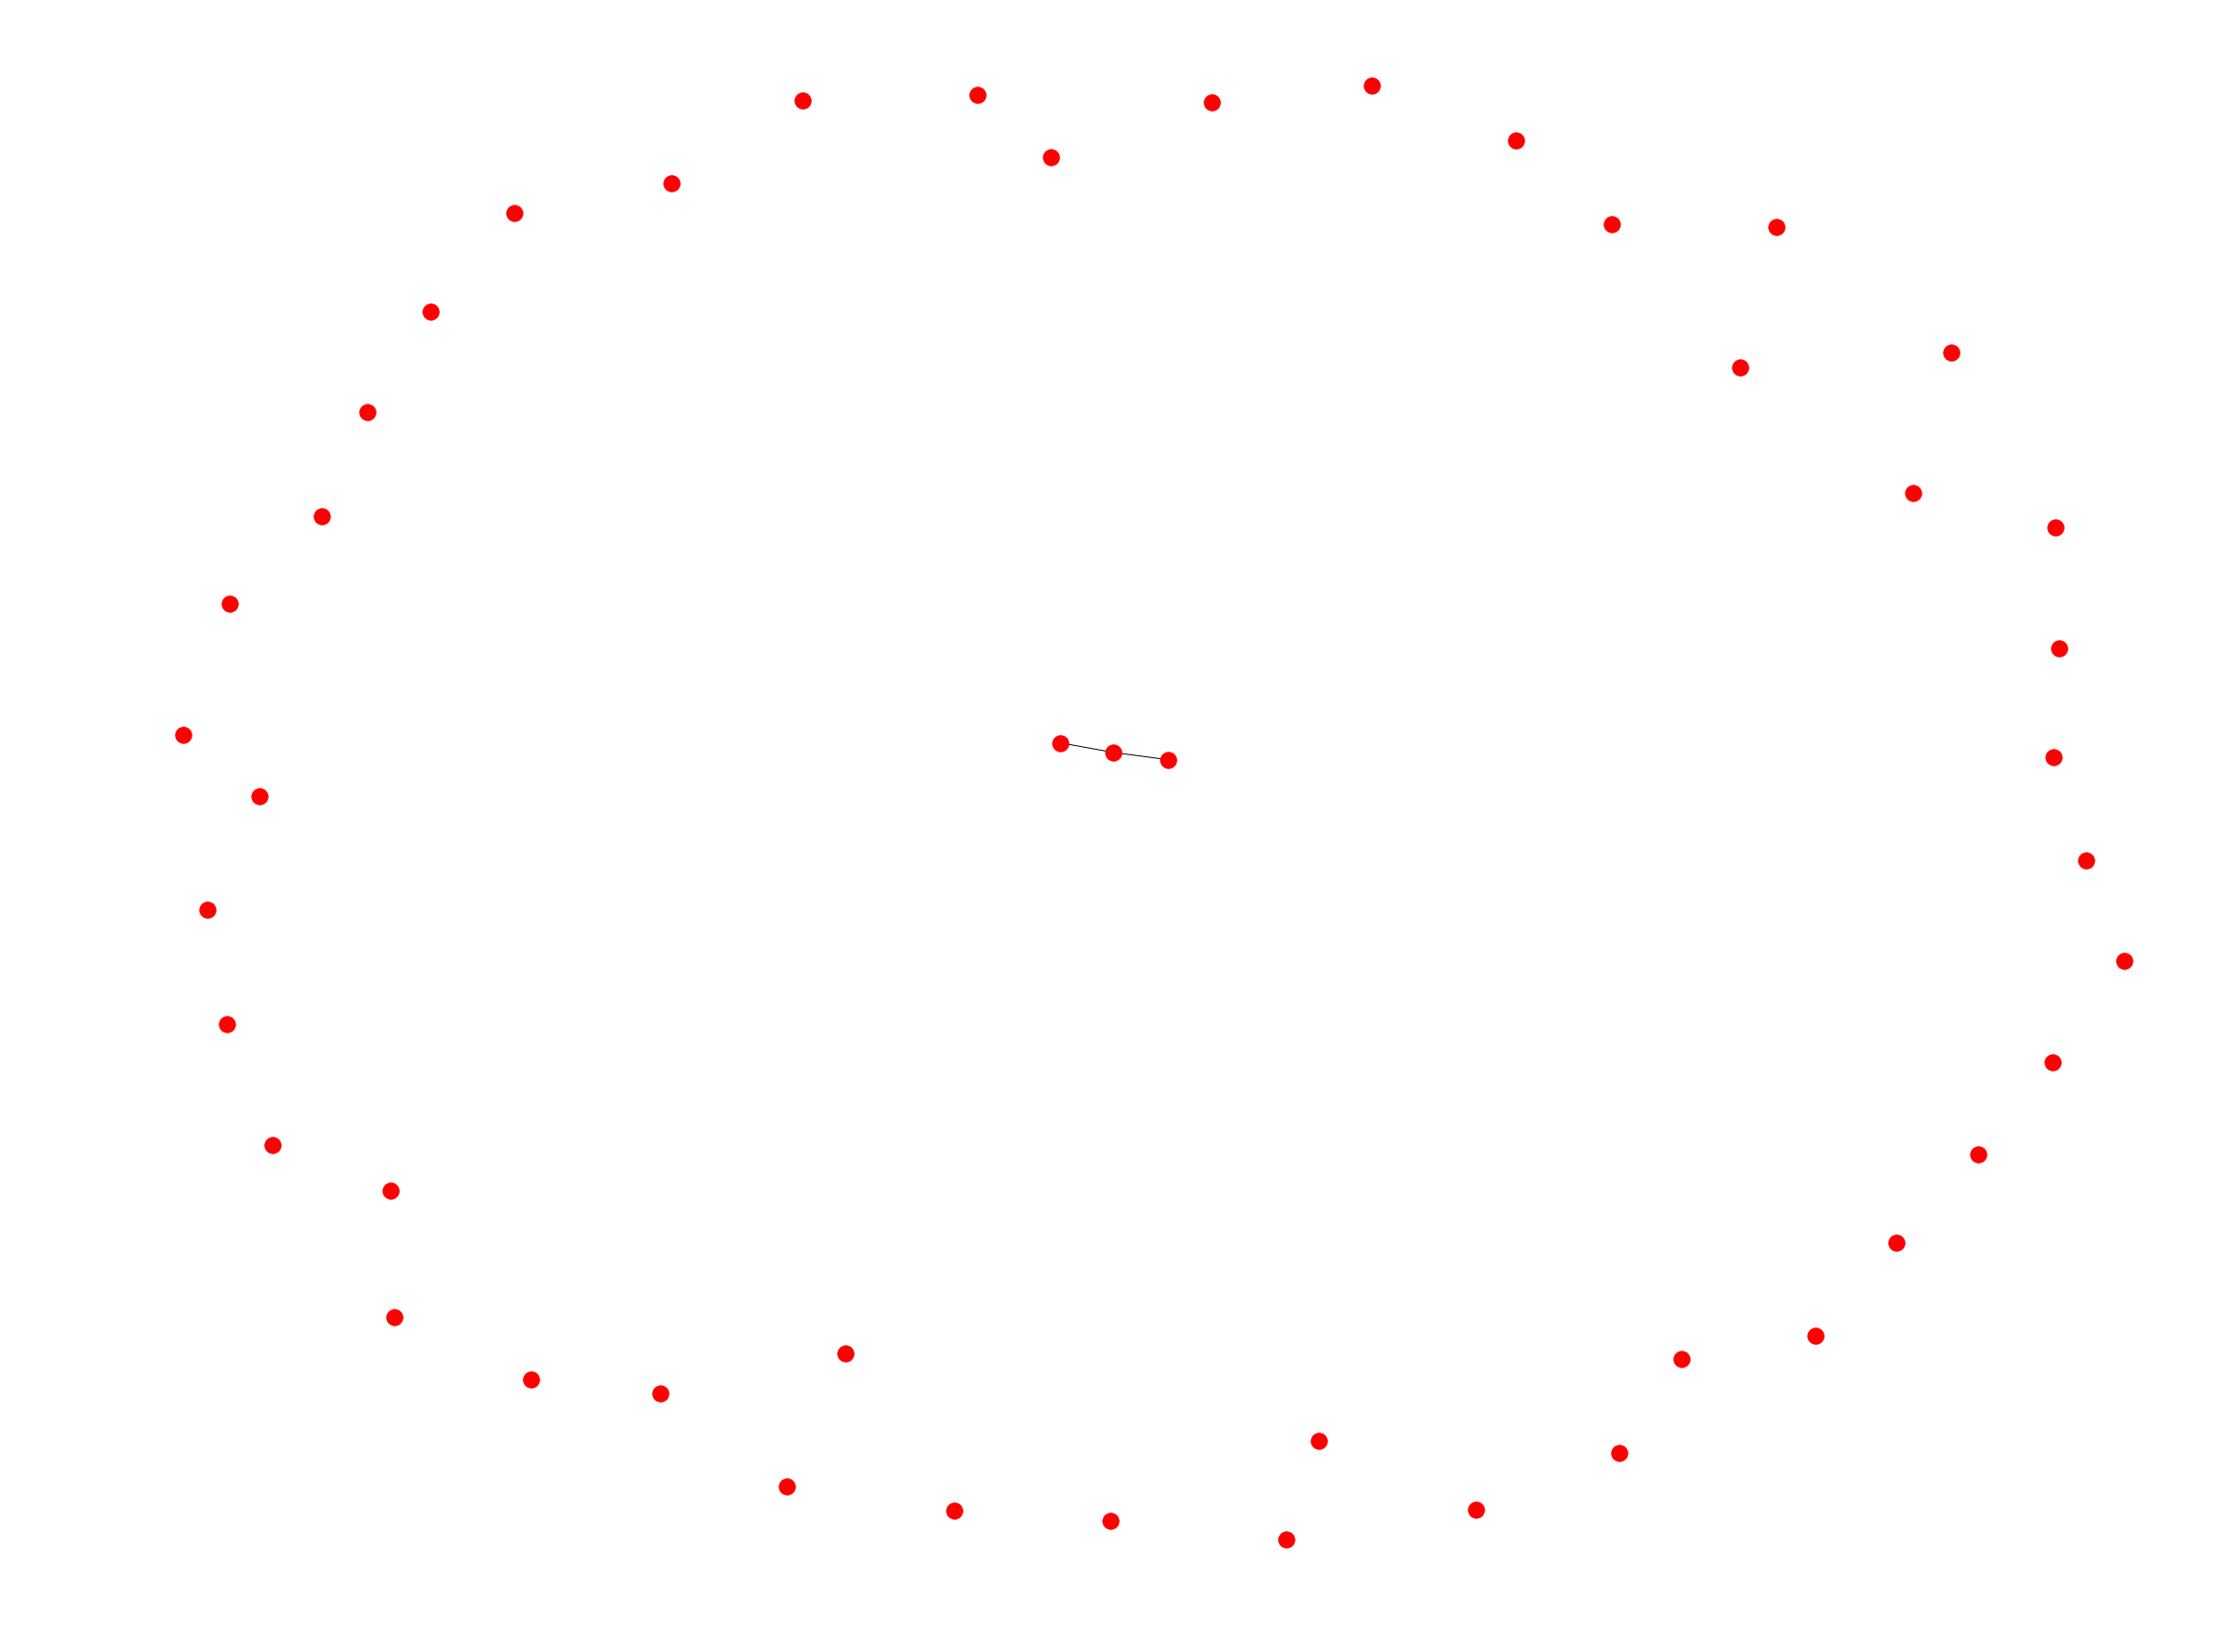

In [6]:
nx.draw(Ge)

In [4]:
saveGraphToFile(Ge,"enrichedFoodWeb.txt")
saveGraphToFile(Gs,"collaborations.txt")
np.savetxt("middleNet.txt",M,fmt="%d")

(47, 47)

(13, 13)



In [3]:
len(Gs.nodes),len(Ge.nodes), M.shape

(13, 47, (13, 47))